# Getting Started with Qiskit

Hello quantum world! In this tutorial, you will embark the journey into the wonderful quantum world with Qiskit. You will create your first quantum program and execute it on a quantum computer.

## Before you begin

You need to install Qiskit to your local development environment for running this tutorial. If you haven't done so already, please follow the installation instructions in the [Getting started guide](https://qiskit.org/documentation/getting_started.html).

## Background information

### Quantum circuit

The fundamental building block of a quantum program in Qiskit is a quantum circuit. A quantum circuit is a model for quantum computation, similar to classical circuits, in which a computation is a sequence of quantum gates, measurements, initialization of qubits to known values, and possibly other actions. (from wiki, need to rephrase)

## Overview

You will follow the standard Qiskit workflow to create and run your first quantum program in four steps:

1. **Create** a quantum circuit that represents the problem you are considering.
2. **Transpile** the circuit for a specific quantum service, e.g. a quantum system or a classical simulator.
3. **Run** the transpiled circuit to the specified quantum service.
4. **Analyze** the results.

## Step 1: Create a quantum circuit

In this step, you will create a simple quantum circuit with 2 qubits and 2 classical bits. 

In [1]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 2 qubits and 2 classical bits
circuit = QuantumCircuit(2, 2)

# Add a Hadamard gate on qubit 0
circuit.h(0)

# Add a CNOT gate on control qubit 0 and target qubit 1
circuit.cx(0,1)

# Measure qubit 0 and 1 and store the results to classical bit 0 and 1
circuit.measure([0,1], [0,1])

# Draw the circuit
circuit.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

## Step 2: Transpile the quantum circuit

In [2]:
from qiskit.providers.fake_provider import FakeVigoV2
from qiskit import transpile

backend = FakeVigoV2()
tqc = transpile(circuit, backend)
tqc.draw()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐      ░ ┌─┐   
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───░─┤M├───
               └─────────┘└────┘└─────────┘┌─┴─┐ ░ └╥┘┌─┐
      q_1 -> 1 ────────────────────────────┤ X ├─░──╫─┤M├
                                           └───┘ ░  ║ └╥┘
ancilla_0 -> 2 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_1 -> 3 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_2 -> 4 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
       meas: 2/═════════════════════════════════════╩══╩═
                                                    0  1

## Step 3: Run the transpiled circuit

In [5]:
job = backend.run(circuit, shot=1000)
result = job.result()
counts = result.get_counts()
counts

{'01': 69, '10': 35, '11': 427, '00': 493}

## Step 4: Analyze the results

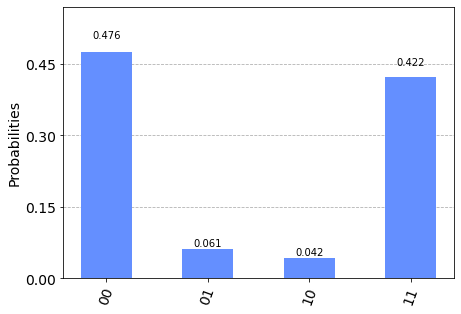

In [4]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

## Summary

## References

## Qiskit versions and copyright

In [1]:
import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright